# Machine Learning Project

## Appliance Energy Prediction

In [59]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Common seed value to be used whenever required
seed = 79
np.random.seed(seed)

### Read the data

In [94]:
energy = pd.read_csv("Data/training.csv")

In [95]:
# Display first 5 rows
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


## Exploratory Analysis

In [96]:
# Dataset characteristics
print("Number of instances in dataset = {}".format(energy.shape[0]))
print("Total number of columns = {}".format(energy.columns.shape[0]))
print("Column wise count of null values:-")
print(energy.isnull().sum())

Number of instances in dataset = 14803
Total number of columns = 32
Column wise count of null values:-
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64


Therefore, we can conclude that the dataset has no missing values in any columns.

### Column wise statistics

In [97]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14803 non-null  object 
 1   Appliances   14803 non-null  int64  
 2   lights       14803 non-null  int64  
 3   T1           14803 non-null  float64
 4   RH_1         14803 non-null  float64
 5   T2           14803 non-null  float64
 6   RH_2         14803 non-null  float64
 7   T3           14803 non-null  float64
 8   RH_3         14803 non-null  float64
 9   T4           14803 non-null  float64
 10  RH_4         14803 non-null  float64
 11  T5           14803 non-null  float64
 12  RH_5         14803 non-null  float64
 13  T6           14803 non-null  float64
 14  RH_6         14803 non-null  float64
 15  T7           14803 non-null  float64
 16  RH_7         14803 non-null  float64
 17  T8           14803 non-null  float64
 18  RH_8         14803 non-null  float64
 19  T9  

In [98]:
energy.Day_of_week.value_counts()

Wednesday    2170
Tuesday      2161
Friday       2157
Thursday     2131
Monday       2101
Sunday       2061
Saturday     2022
Name: Day_of_week, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
energy['WeekStatus'] = le.fit_transform(energy['WeekStatus'])

In [101]:
energy['Day_of_week'] = le.fit_transform(energy['Day_of_week'])

In [100]:
energy.WeekStatus.value_counts() 

0    10720
1     4083
Name: WeekStatus, dtype: int64

In [102]:
energy.Day_of_week.value_counts()

6    2170
5    2161
0    2157
4    2131
1    2101
3    2061
2    2022
Name: Day_of_week, dtype: int64

In [64]:
# Columns for temperature sensors
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Columns for humidity sensors
rho_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Columns for weather data
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]

# Target variable column
target = ["Appliances"]

In [65]:
energy[temp_cols].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,21.684167,20.342506,22.262628,20.855433,19.585043,7.921003,20.263911,22.029160,19.480759
std,1.607780,2.191842,2.013785,2.044786,1.847725,6.103785,2.115320,1.958897,2.017733
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.730000,18.823333,20.790000,19.500000,18.265000,3.656667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.295000,20.033333,22.128571,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.600000,11.245000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.745000,28.290000,26.000000,27.230000,24.500000


In [66]:
energy[rho_cols].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,40.271439,40.418056,39.249149,39.030359,50.961769,54.623669,35.387456,42.924554,41.542065
std,3.981741,4.066223,3.252755,4.339783,9.046095,31.203920,5.118179,5.242376,4.150839
min,27.023333,20.893333,28.766667,27.660000,29.856667,1.000000,23.200000,29.600000,29.166667
25%,37.361667,37.900000,36.900000,35.530000,45.400000,30.098333,31.500000,39.060000,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.296667,34.823333,42.363333,40.863333
75%,43.090000,43.290000,41.761667,42.130000,53.663333,83.326667,39.002500,46.561667,44.363333
max,63.360000,56.026667,50.163333,51.063333,95.953889,99.900000,51.400000,58.780000,53.326667


In [67]:
energy[weather_cols].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,7.413018,3.756859,79.734122,755.502983,4.034470,38.330141
std,5.323843,4.200297,14.955609,7.427684,2.436870,11.812780
min,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000
25%,3.666667,0.900000,70.000000,750.866667,2.000000,29.000000
50%,6.900000,3.450000,83.666667,756.100000,3.666667,40.000000
75%,10.400000,6.533333,91.666667,760.933333,5.500000,40.000000
max,25.966667,15.500000,100.000000,772.300000,13.500000,66.000000


In [68]:
energy[target].describe()

,Appliances
count,14803.000000
mean,98.011214
std,102.828019
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


### Observations

* Temperature ranges for all home sensors is between 14.89℃ to 29.86℃ except for T6 for which it is -6.06℃ to 28.29℃. The reason for such low readings is that the sensor is kept outside.
* Similarly, humudity ranges for all home sensors is between 20.60`%` to 63.36%. Except for RH_5 and RH_6, whose ranges are 29.82`%` to 96.32`%` and 1`%` to 99.9`%` respectively.
    * The reason behind this is that RH_5 is inside the bathroom,
    * And RH_6 is outside the building, explaining the high humidity values.
* One interesting observation can be seen in `Appliances` column that although the max consumption is 1080`Wh`, 75`%` of values are less than 100`Wh`. This shows that there are fewer cases when Appliance energy consumption is very high.

## Exploratory Visualization

### Correlation plots

#### Temperature sensors

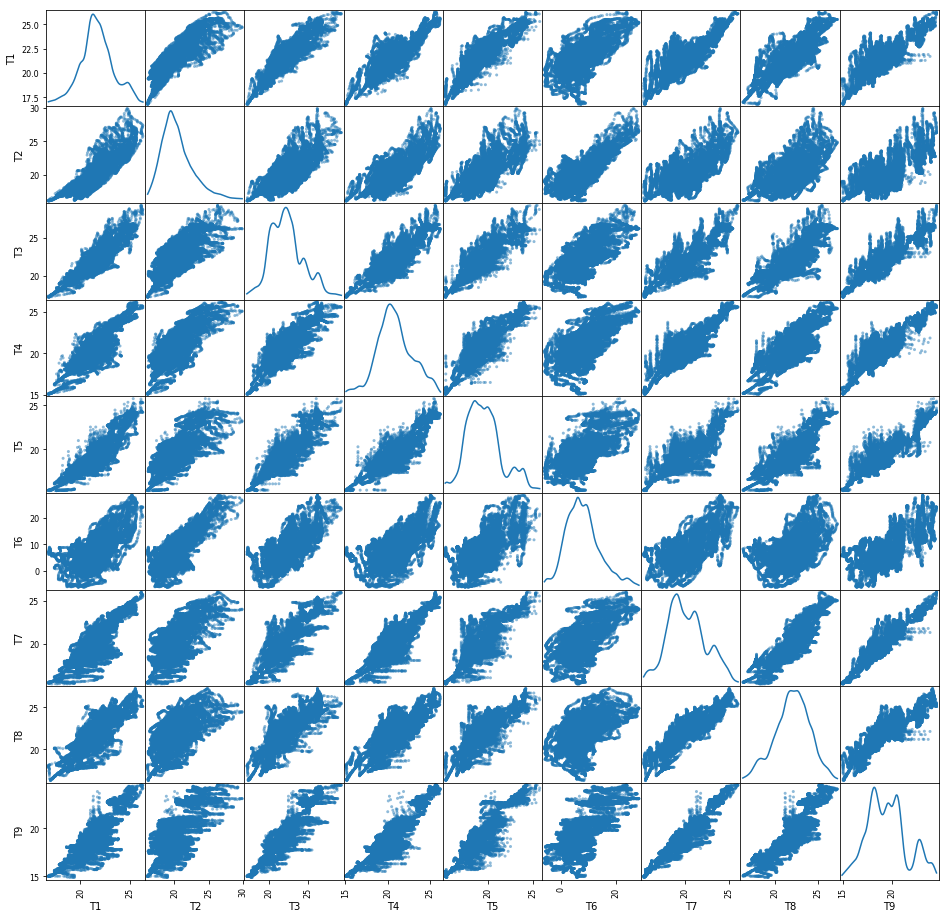

In [69]:
temp_scatter = pd.plotting.scatter_matrix(energy[temp_cols], diagonal="kde", figsize=(16, 16))

We can see that there is a significant correlation between the columns `T7` and `T9`. We will check this correlation statistically in later section. Let's check the plot between these two columns once more.

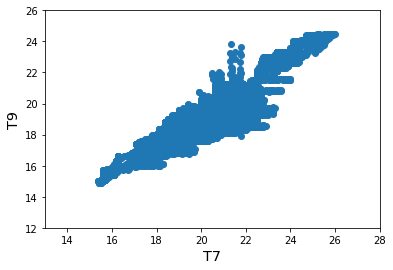

In [70]:
plt.xlabel("T7", fontsize='x-large')
plt.ylabel("T9", fontsize='x-large')

plt.xlim(int(energy.T7.min()) - 2, int(energy.T7.max()) + 2)
plt.ylim(int(energy.T9.min()) - 2, int(energy.T9.max()) + 2)

plt.scatter(energy["T7"], energy["T9"])

#### Humidity sensors

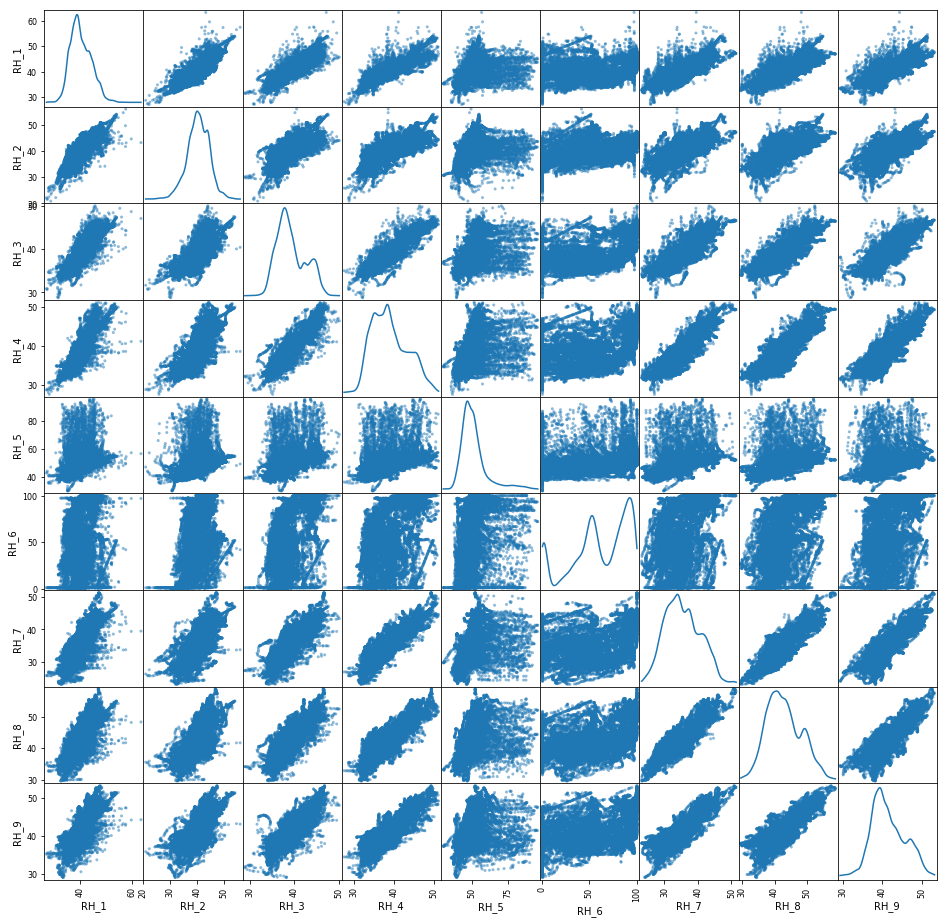

In [71]:
rho_scatter = pd.plotting.scatter_matrix(energy[rho_cols], diagonal="kde", figsize=(16, 16))

No significant correlation among for humidity sensors.

#### Weather data

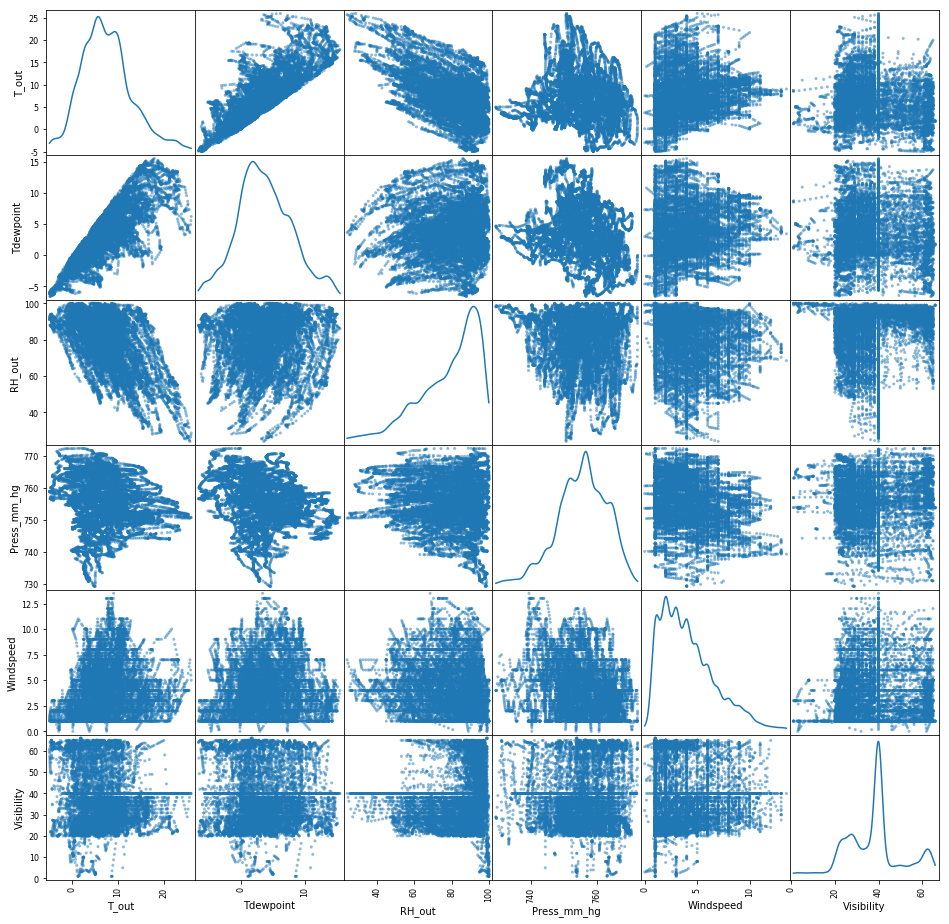

In [72]:
weather_scatter = pd.plotting.scatter_matrix(energy[weather_cols], diagonal="kde", figsize=(16, 16))

We can see here that the features of weather data are uncorrelated to one another.

### Histogram for each column

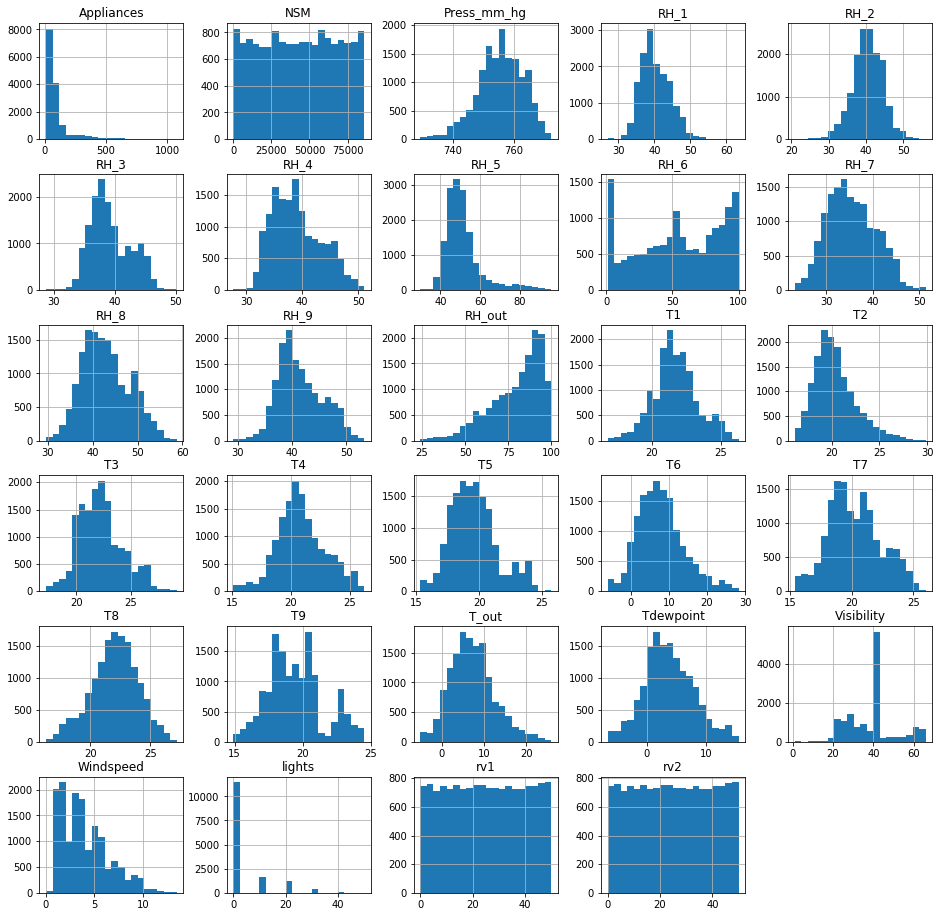

In [73]:
histograms = energy.hist(figsize=(16, 16), bins=20)

It can be observed from Histograms that:-
* All humidity values except `RH_6` and `RH_out` follow a Normal distribution. That is, all the readings from sensors inside the home are from a Normal distribution.
* Similarly, all temperature readings follow a Normal distribution except for `T9`.
* Out of the remaining columns, we can see that `Visibility`, `Windspeed` and **`Appliances`** are skewed.
* Also, there is no similarity between our target variable, **`Appliances`** and the remaining 24 columns. `Windspeed` looks similar but the number of observations are different as seen from the y-axes of both plots.

Let's confirm this by plotting **`Appliances`** against `Windspeed`.
Also, let's plot **`Appliances`** histogram separately to get better idea about it's distribution.

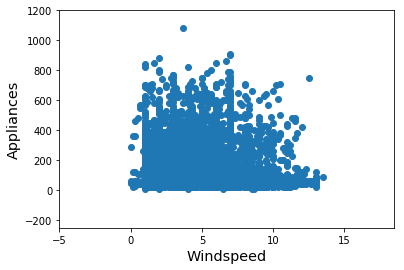

In [74]:
plt.xlabel("Windspeed", fontsize='x-large')
plt.ylabel("Appliances", fontsize='x-large')

plt.xlim(-5, energy.Windspeed.max() + 5)
plt.ylim(-250, 1200)

plt.scatter(energy["Windspeed"], energy["Appliances"])

Hence, it is confirmed that `Windspeed` does not share a linear relationship with **`Appliances`** column.

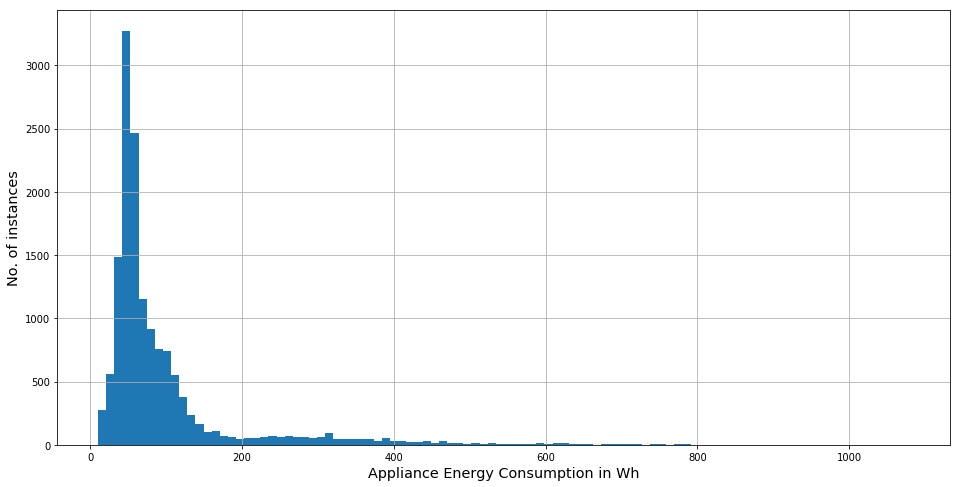

In [75]:
# Histogram for appliances

plt.xlabel("Appliance Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")

energy["Appliances"].hist(figsize=(16, 8), bins=100)

We can see that most values are in the range of 0-200 `Wh`, strengthening our assumption that there are few cases of high energy consumption. The percentage of values within this range is calculated below.

In [103]:
print("Percentage of dataset in range of 0-200 Wh")
print("{:.3f}%".format(
    (energy[energy.Appliances <= 200]["Appliances"].count()*100.0) / energy.shape[0]
))

Percentage of dataset in range of 0-200 Wh
90.151%


Now let's check the correlation between `T7` and `T9`.

In [104]:
# Import pearson relation method from SciPy
from scipy.stats import pearsonr

# Calculate the coefficient and p-value
corr_coef, p_val = pearsonr(energy["T7"], energy["T9"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.9443630975074806
p-value : 0.0


We can see that there is a very high degree of positive correlation between this two columns. Also, p-value is less than 0.01. Thereofore, we can reject the `null hypothesis` that this two columns don't affect each other.

Let's manually calculate which column pairs have a high degree of correlation (> 0.9).

In [105]:
energy_data = energy.drop("date",axis=1)

In [106]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14803 entries, 0 to 14802
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   14803 non-null  int64  
 1   lights       14803 non-null  int64  
 2   T1           14803 non-null  float64
 3   RH_1         14803 non-null  float64
 4   T2           14803 non-null  float64
 5   RH_2         14803 non-null  float64
 6   T3           14803 non-null  float64
 7   RH_3         14803 non-null  float64
 8   T4           14803 non-null  float64
 9   RH_4         14803 non-null  float64
 10  T5           14803 non-null  float64
 11  RH_5         14803 non-null  float64
 12  T6           14803 non-null  float64
 13  RH_6         14803 non-null  float64
 14  T7           14803 non-null  float64
 15  RH_7         14803 non-null  float64
 16  T8           14803 non-null  float64
 17  RH_8         14803 non-null  float64
 18  T9           14803 non-null  float64
 19  RH_9

In [107]:
energy_data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],
      dtype='object')

In [108]:
# To generate all pairs for given columns
from itertools import combinations

for pair in combinations(energy_data.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(energy_data[col_1], energy_data[col_2])
    if p_val >0.9 or p_val < -0.9:
        print("Column pair : {}, {}".format(*pair))
        print("p-value:{}".format(p_val))
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : lights, rv1
p-value:0.981703516383972
Column pair : lights, rv2
p-value:0.981703516383972
Column pair : T1, RH_2
p-value:0.944340039961281
Column pair : T3, T9
Correlation coefficient : 0.9012828822650171
p-value : 0.0
Column pair : T4, rv1
p-value:0.9286041385692201
Column pair : T4, rv2
p-value:0.9286041385692201
Column pair : T5, T9
Correlation coefficient : 0.9118602394113894
p-value : 0.0
Column pair : T5, Day_of_week
p-value:0.955121165971967
Column pair : T6, T_out
Correlation coefficient : 0.9748504632027217
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9443630975074806
p-value : 0.0
Column pair : RH_7, Visibility
p-value:0.9120809051179378
Column pair : T9, rv1
p-value:0.9766066803180408
Column pair : T9, rv2
p-value:0.9766066803180408
Column pair : RH_9, rv1
p-value:0.9268906007532389
Column pair : RH_9, rv2
p-value:0.9268906007532389
Column pair : Press_mm_hg, Day_of_week
p-value:0.9388521177321056
Column pair : rv1, rv2
Correlation coefficient

Interestingly, 3 columns have a high degree of correlation with `T9`, all of which have a p-value < 0.01. Therefore, `T9` can be considered as redundant.

Also, a very high correlation exists between features `T6` and `T_out`. This shouldn't be surprising as `T6` is reading from a temperature sensor kept outside the building and `T_out` is temperature obtained from Weather station.

Let's plot `T6` and `T_out` to get a detailed visualization.

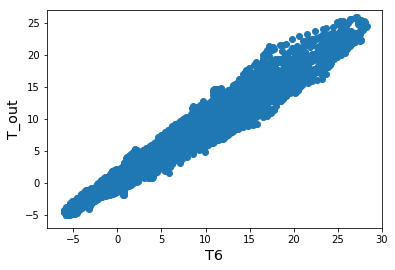

In [109]:
plt.xlabel("T6", fontsize='x-large')
plt.ylabel("T_out", fontsize='x-large')

plt.xlim(int(energy_data.T6.min()) - 2, int(energy_data.T6.max()) + 2)
plt.ylim(int(energy_data.T_out.min()) - 2, int(energy_data.T_out.max()) + 2)

plt.scatter(energy_data["T6"], energy_data["T_out"])

It is evident from the plot as well that these two features are highly correlated.

## Benchmark Model

For benchmark, I will use Linear regression, using all the features as input data and without scaling the dataset. This will give an idea about the improvements gained from:
* Performing feature scaling.
* Performing feature selection.
* Performing cross validation.
* Using more complex Regression algorithms.
* Hyper-parameter tuning of the regressor.

In [110]:
test.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [181]:
from sklearn.linear_model import LinearRegression
from time import time

# Prepare the data
X_train = energy_data.drop("Appliances", axis=1)
y_train = energy_data["Appliances"]

# Initialize and fit the model
benchmark_model = LinearRegression()
start = time()
benchmark_model.fit(X_train, y_train)
end = time()

print("Classifier fitted in {:.3f} seconds".format(end-start))

# Load the test dataset
test_data = pd.read_csv("Data/testing.csv")
test_data['WeekStatus'] = le.fit_transform(test_data['WeekStatus'])
test_data['Day_of_week'] = le.fit_transform(test_data['Day_of_week'])

# Separate the features and the target variable
X_test = test_data.drop(["date","Appliances"], axis=1)
y_test = test_data["Appliances"]

# Print scores on both
print("Score on training data : {:.3f}%".format(benchmark_model.score(X_train, y_train) * 100))
print("Score on testing data : {:.3f}%".format(benchmark_model.score(X_test, y_test) * 100))

Classifier fitted in 0.024 seconds
Score on training data : 17.684%
Score on testing data : 15.625%


## Data Preprocessing

In [182]:
# Remove correlated features T6 and T9
train = energy.drop(["date","T6", "T9"], axis=1)
test = test_data.drop(["date","T6", "T9"], axis=1)

In [184]:
test.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,0,1
1,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,0,1
2,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,0,1
3,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,0,1
4,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,0,1


In [218]:
# Prepare training and testing data
X_train = train.drop(["Appliances"], axis=1)
X_test = test.drop(["Appliances"], axis=1)

In [220]:
y_train = train.drop(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4','RH_4', 'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility','Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],axis=1)
y_test = test.drop(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4','RH_4', 'T5', 'RH_5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility','Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],axis=1)

In [221]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Scales the data to zero mean and unit variance
standard_scaler = StandardScaler()

In [222]:
# Store the scaled data in new dataframes
train_sc = standard_scaler.fit_transform(X_train)
test_sc = standard_scaler.fit_transform(X_test)

In [234]:
train_sc.ravel()

array([ 3.29938999, -1.11596553,  1.83976682, ...,  0.87368554,
       -0.61715222, -1.49737472])

In [235]:
y_train.values.ravel()

array([ 60,  60,  50, ...,  90, 420, 430], dtype=int64)

### Algorithms to be used

Regularized Linear models as an improvement over Linear Regression.

* Ridge Regression
* Lasso Regression

Ensemble based Tree Regression models to deal robustly with outlier data and large number of features.

* Random Forests
* Gradient  Boosting
* Extra Trees

Neural networks for exploring non linear relationships between features and target.

* Multi-Layer Preceptron

### Model Implementation

In [223]:
# To calculate Root mean squared error
from sklearn.metrics import mean_squared_error

# Function to fit the regressor and record its metrics
def pipeline(reg, X_train, y_train, X_test, y_test, **kwargs):
    # Dictionary to hold the properties
    reg_props = {}
    
    # Initialize and fit the regressor while recording the time taken for fitting
    regressor = reg(**kwargs)
    start = time()
    regressor.fit(X_train, y_train)
    end = time()
    
    # Store the metrics for the regressor
    reg_props["name"] = reg.__name__
    reg_props["train_time"] = end - start
    reg_props["train_score"] = regressor.score(X_train, y_train)
    reg_props["test_score"] = regressor.score(X_test, y_test)
    reg_props["rmse"] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
    
    return reg_props

In [236]:
# Import the required Regression algorithms
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Function to execute each algorithm through the pipeline
def execute_pipeline():
    # Create the list of algorithms
    regressors = [
        Ridge,
        Lasso,
        RandomForestRegressor,
        GradientBoostingRegressor,
        ExtraTreesRegressor,
        MLPRegressor
    ]
    
    # To store the properties for each regressor
    props = []
    
    """
    Iterate thorugh the list of regressors,
    passing each thorugh the pipeline and
    storing its properites
    """ 
    for reg in regressors:
        properites = pipeline(reg, train_sc, y_train.values.ravel(), test_sc, y_test.values.ravel(), random_state=seed)
        props.append(properites)
        
    return props

In [237]:
# Consolidate the properties into a DataFrame
def get_properties():
    # Obtain the properties after executing the pipeline
    properties = execute_pipeline()
    
    # Extract each individual property of the Regressors
    names = [prop["name"] for prop in properties]
    train_times = [prop["train_time"] for prop in properties]
    train_scores = [prop["train_score"] for prop in properties]
    test_scores = [prop["test_score"] for prop in properties]
    rmse_vals = [prop["rmse"] for prop in properties]
    
    # Create a DataFrame from these properties
    df = pd.DataFrame(index=names, 
                    data = {
                            "Training times": train_times,
                            "Training scores": train_scores,
                            "Testing scores": test_scores,
                            "RMSE": rmse_vals
                      }
                  )
    
    return df

In [238]:
# Obain the properties in a structured DataFrame after executing the pipeline
properties = get_properties()

C:\Users\Anil Arella\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Visualizing Performance

In [243]:
# Calculate RMSE for the Benchmark model

test_data = pd.read_csv("Data/testing.csv")
test_data['WeekStatus'] = le.fit_transform(test_data['WeekStatus'])
test_data['Day_of_week'] = le.fit_transform(test_data['Day_of_week'])
# For calculating RMSE of Linear Regression (Benchmark Model),  
# we will scale the dataset so that all RMSE values are in the same scale
# We can inverse scale the data for other Regressor, but that will be more cumbersome to do
train_data = energy.drop(["date"],axis=1)
test_data = test_data.drop(["date"],axis=1)
data = standard_scaler.fit_transform(train_data)
test_data = standard_scaler.fit_transform(test_data)

X = data[:, :-1]
y = data[:, -1]
X_t = test_data[:, :-1]
y_t = test_data[:, -1]

# Fit the model
start = time()
benchmark_model.fit(X, y)
end = time()

# Append the peoperties of Benchmark model to the DataFrame
# storing the properties of selected models

properties = pd.concat(
    [properties,
    pd.Series(
    {
        "RMSE": np.sqrt(mean_squared_error(y_t, benchmark_model.predict(X_t))),
        "Training scores": benchmark_model.score(X, y),
        "Testing scores" :benchmark_model.score(X_t, y_t),
        "Training times": end - start,
        "Name": "Linear Regression (Benchmark)"
    }
    ).to_frame().T.set_index(["Name"])],sort=True
)

properties

,RMSE,Testing scores,Training scores,Training times
Ridge,93.8002,0.14771,0.16978,0.00798798
Lasso,94.0125,0.143848,0.156793,0.164011
RandomForestRegressor,71.4008,0.50616,0.936501,101.983
GradientBoostingRegressor,85.0825,0.298769,0.373523,27.2962
ExtraTreesRegressor,66.625,0.570014,1,32.6738
MLPRegressor,87.0868,0.265343,0.312525,58.1061
Linear Regression (Benchmark),0.934999,0.125776,0.131978,0.0159976


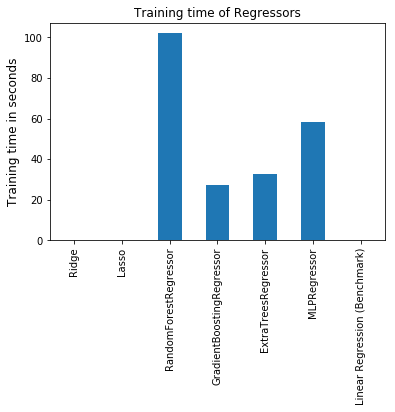

In [244]:
# Plot to compare the training time of algorithms
plt.ylabel("Training time in seconds", fontsize="large")
properties["Training times"].plot(kind="bar", title="Training time of Regressors")

* Fastest Regressor to train - Linear, Ridge and Lasso Regressors
* Slowest Regressor to train - Multi Layer Perceptron

Text(0,0.5,'R2 Score/ RMSE')

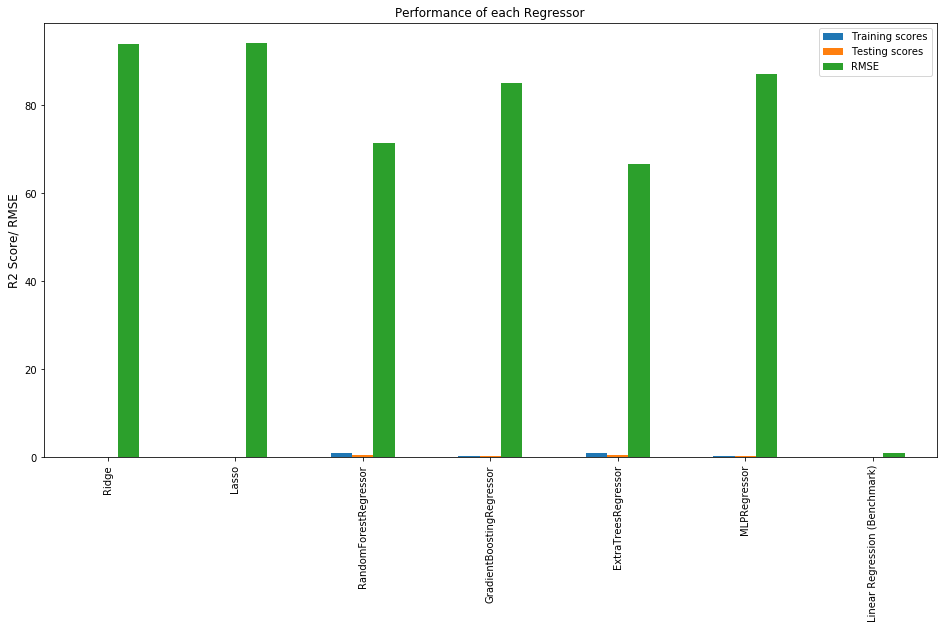

In [245]:
# Plot to compare the performance of the algorithms on both datasets
ax= properties[["Training scores", "Testing scores", "RMSE"]].plot(kind="bar", title="Performance of each Regressor", figsize=(16, 8))
ax.set_ylabel("R2 Score/ RMSE", fontsize="large")

* Least performing Regressor - Lasso Regressor
* Best performing Regressor - Extra Trees Regressor


Even though Extra Trees Regressor has a R2 score of 1.0 on traininig set, which might suggest overfitting but, it has the highest score on test set and also, it's RMSE value is also the lowest. Clearly, ExtraTreesRegressor is the best model out of given models.

### Hyperparameter Tuning

In [246]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the best performing regressor
clf = ExtraTreesRegressor(random_state=seed)

# Define the parameter subset
param_grid = {
    "n_estimators": [10, 50, 100, 200, 250],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [None, 10, 50, 100, 200, 500]
}

# Use Randomized search to try 20 subsets from parameter space with 5-fold cross validation
grid_search = RandomizedSearchCV(clf, param_grid, n_iter=20, scoring="r2", cv=5, n_jobs=-1, verbose=2, random_state=seed)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.2min finished
C:\Users\Anil Arella\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

### Review

In [247]:
# Display best params
print("Parameters of best Regressor : {}".format(grid_search.best_params_))

Parameters of best Regressor : {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 10}


In [248]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(X_train, y_train)))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))))
print("R2 score on Testing set = {:.3f}".format(best_model.score(X_test, y_test)))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))

R2 score on Training set = 0.406
RMSE on Training set = 79.243
R2 score on Testing set = 0.309
RMSE on Testing set = 84.446


**R2 score improvement from Benchmark model = 0.467.** <br>
**RMSE improvement from Benchmark model = 0.302.**     <br>
**R2 score improvement from Untuned model = 0.058.**   <br>
**RMSE improvement from Untuned model = 0.041.**

#### Feature Analysis

In [249]:
# Find the index of most and least important feature and display that column
print("Most important feature = {}".format(X_train.columns[np.argmax(best_model.feature_importances_)]))
print("Least important feature = {}".format(X_train.columns[np.argmin(best_model.feature_importances_)]))

# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)

print("\nTop 5 most important features:-")
# Reverse the array to get important features at the beginning
for index in feature_indices[::-1][:5]:
    print(X_train.columns[index])
    
print("\nTop 5 least important features:-")
for index in feature_indices[:5]:
    print(X_train.columns[index])

Most important feature = NSM
Least important feature = rv2

Top 5 most important features:-
NSM
lights
RH_6
RH_out
T2

Top 5 least important features:-
rv2
rv1
WeekStatus
Visibility
RH_5


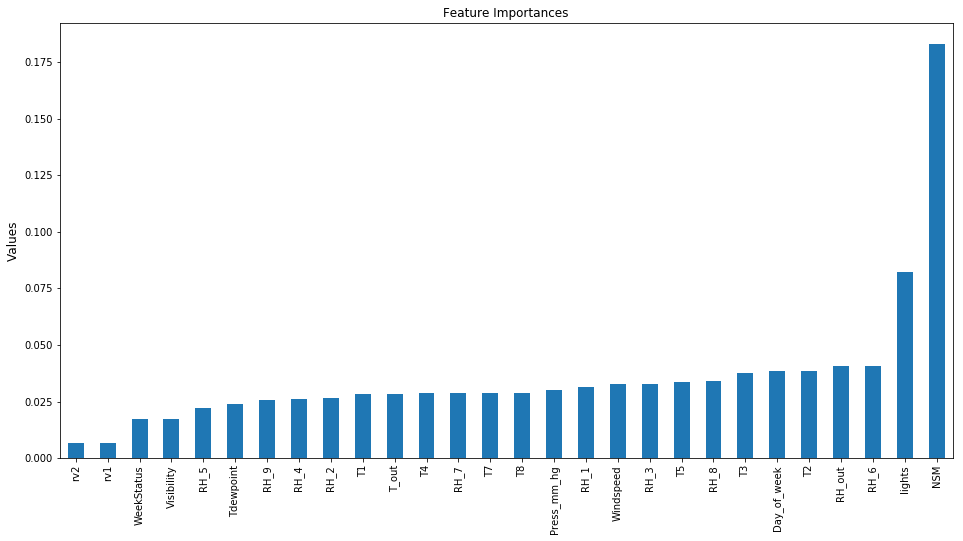

In [250]:
# Plot feature importance

fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))

ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

In [251]:
# Constructing data set from reduced feature space
X_train_reduced = X_train[X_train.columns[feature_indices[::-1][:5]]]
X_test_reduced = X_test[X_test.columns[feature_indices[::-1][:5]]]

In [252]:
from sklearn.base import clone

# Clone the best model
reg_best = clone(best_model)
# Fit the model on reduced data set 
reg_best.fit(X_train_reduced, y_train)
print("R2 Score on testing dataset = {:.3f}".format(reg_best.score(X_test_reduced, y_test)))
print("RMSE Score on testing dataset = {:.3f}".format(np.sqrt(mean_squared_error(y_test, reg_best.predict(X_test_reduced)))))

C:\Users\Anil Arella\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2 Score on testing dataset = 0.222
RMSE Score on testing dataset = 89.616


Difference in R2 score = 0.222 or 22.2% loss of explained variance. <br>
Increase in RMSE = 89.616

This is a very high difference and hence we cannot reduce the feature space for final model.

## Conclusion

* Best Algorithm = Extra Trees Regressor
* Variance explained on test set = 61`%`.
* Improvement from benchmark model in terms of percentage of variance explained:-
    * Training data = 85.3`%`
    * Test data = 46.7`%`
* No. of features used in final model = 22.